In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
!wget https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2017/11/04133712/waterfall.jpg


--2021-11-29 03:34:31--  https://s3-us-west-2.amazonaws.com/uw-s3-cdn/wp-content/uploads/sites/6/2017/11/04133712/waterfall.jpg
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.168.104
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.168.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1760735 (1.7M) [image/jpeg]
Saving to: ‘waterfall.jpg.6’

waterfall.jpg.6     100%[===================>]   1.68M  3.37MB/s    in 0.5s    

2021-11-29 03:34:32 (3.37 MB/s) - ‘waterfall.jpg.6’ saved [1760735/1760735]



In [87]:
from skimage.io import imread
im = imread ('waterfall.jpg')
from skimage.transform import resize

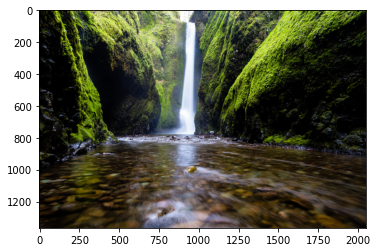

In [88]:
plt.imshow(im)

In [89]:
im_small = resize(im, (im.shape[0] // 10, im.shape[1] // 10), anti_aliasing=True)

data = np.reshape(im_small, (np.shape(im_small)[0]* np.shape(im_small)[1], 3))

In [90]:
N = np.shape(data)[0]
K = 2

rn = np.zeros((N,K))

for i in range(N):
  nr = np.random.randint(0, K)
  rn[i,nr] = 1

mus = data[np.random.permutation(N)[:K], :]

In [91]:
test = mus.T

In [92]:
def J():
  value = 0
  for i in range(N):
    for k in range(K):
      value += rn[i, k] * np.sum((data[i, :] - test[:, k])**2)
  return value

In [93]:
def expectation():
  # expectation
  for ix in range(N):
    initial_assignment = rn[ix, :]
    cost_before_switch = J()
    rn[ix, 0] = 1 - rn[ix, 0] 
    rn[ix, 1] = 1 - rn[ix, 1] 
    cost_after_switch = J()
    if(cost_after_switch > cost_before_switch):
      rn[ix, 0] = 1 - rn[ix, 0]
      rn[ix, 1] = 1- rn[ix, 1]

In [94]:
def maximization():
  mu_x = 0
  mu_y = 0
  for x in range(2) :
    mu_x = np.sum(np.multiply(rn[:, 0], X[:, x])) / np.sum(rn[:, 0])
    mus[x, 0] = mu_x
  for y in range(2) :
    mu_y = np.sum(np.multiply(rn[:, 1], X[:, y])) / np.sum(rn[:, 1])
    mus[y, 1] = mu_y  



In [95]:
#np.sum((data[1, :] - mus[:, 2])**2)

In [96]:
data.shape

(27744, 3)

In [97]:
test = mus.T

In [ ]:
for iter in range(6):
  c1_before = J()
  expectation()
  c1_after = J()
  print("Before/after expectation:", c1_before, ",", c1_after)

  c2_before = J()
  maximization()
  c2_after = J()
  print("Before/after maximization:", c2_before, ",", c2_after)

mus = mus.T
# blue is first mu
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=rn[:, 0])
plt.scatter(mus[:, 0], mus[:, 1], s=1000, c=mus[:, 1])